# LastMinuteHealth - Sam

### Before Start: Import Libraries & Download VCL Media Player (https://www.videolan.org/vlc/)

In [157]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install python-vlc

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import signal
import vlc
import time
import random
import os

print("\nDone!")


Done!


In [181]:
total_start_time = time.time()
print(total_start_time)
t = time.time()

while (t != total_end_time):
    print('runnning')
    manual_stop = input("Press enter to stop")
    total_end_time = time.time() 
    t = total_end_time
    if (t<total_end_time):
        continue
    else:
        break

print(total_end_time)

1627860560.924577
runnning
Press enter to stop
1627860566.484658


### Main Code - Version 1 (Goal Work Time)

In [180]:
#SET YOUR GOAL WORK TIME (IN MINUTES)
goal = input("Goal work time in minutes")


flow_counter = 0
t = 0

while (t < int(goal)):
        t = (time.time())/60

        #IMPORT DATA - *LIVE DATA INPUT GOES HERE - call it channelData*
        channelData = []
        with open("data/two_calm.csv", "r") as data:
            for line in data:
                line = line.split(",")
                channelData.append(float(line[0]))

        for point in range(len(channelData)):
            if(point%2 != 0):
                channelData[point] = channelData[point-1]

        #FFT
        fftData = np.fft.fft(channelData)
        freq = np.fft.fftfreq(len(channelData))*250

        #REMOVE SYMMETRIC NEGATIVE DATA
        fftData = fftData[1:int(len(fftData)/2)]
        freq = freq[1:int(len(freq)/2)]

        #FFT FORMULA WITH IMAGONARY COMPONENT
        fftData = np.sqrt(fftData.real**2 + fftData.imag**2)

        #REMOVE UPPER FREQUENCIES
        freq = freq[0:50000]
        fftData = fftData[0:50000]

        #FREQUENCY DOMAIN PLOT
        plt.plot(freq, fftData)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.show()
        plt.clf()

        #DEFINE BINS FOR BRAINWAVE TYPES
        bandTotals = [0,0,0,0,0]
        bandCounts = [0,0,0,0,0]

        for point in range(len(freq)):
            if(freq[point] < 4):
                bandTotals[0] += fftData[point]
                bandCounts[0] += 1
            elif(freq[point] < 8):
                bandTotals[1] += fftData[point]
                bandCounts[1] += 1
            elif(freq[point] < 12):
                bandTotals[2] += fftData[point]
                bandCounts[2] += 1
            elif(freq[point] < 30):
                bandTotals[3] += fftData[point]
                bandCounts[3] += 1
            elif(freq[point] > 30):
                bandTotals[4] += fftData[point]
                bandCounts[4] += 1

        #SAVE AVG OF ALL POINTS 
        bands = list(np.array(bandTotals)/np.array(bandCounts))

        #BAR GRAPH WITH BRAINWAVE BINS
        def plotBands(bands):
            binNames = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
            plt.ylabel("Amplitude")
            plt.bar(binNames, bands, color="#7967e1")
            plt.show()
            plt.clf()

        plotBands(bands)

        #IDENTIFY MOST PREVALENT WAVE TYPE
        waveType = {
            bands[0]:"Delta",
            bands[1]:"Theta",
            bands[2]:"Alpha",
            bands[3]:"Beta",
            bands[4]:"Gamma",}

#         max_waveType = waveType[max(bands)]
#         print(waveType[max(bands)])
        max_waveType = waveType[bands[2]] #use this to test

        #COMPARE MAX WAVE TYPE TO FLOW STATE (Alpha or Theta) vs TOO HYPER (Gamma or Beta) vs TOO RELAXED (Delta)

        if max_waveType == (waveType[bands[1]]) or max_waveType == (waveType[bands[2]]): #is most prevalent wave type alpha or theta?
            # Start Flow Timer
            print("Start Flow")
            flow_start_time = time.time()
            print(flow_start_time)

            print("You are in FLOW!")

            #Play Flow Music
            player = vlc.MediaPlayer("file:///Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Chill music/" + random.choice(os.listdir("/Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Chill music")))
            player.play()
            time.sleep(10)
            player.stop()

            # End Flow Timer
            flow_end_time = time.time()
            print("End Flow")
            print(flow_end_time)
            print("--------------------")
            flow_duration = (flow_end_time - flow_start_time)/60 #converts second to minutes
            
            #TOTAL FLOW COUNTER
            flow_counter =+ flow_duration


        elif max_waveType == waveType[bands[0]]: #is most prevalent wave type delta?

            print("You are not in FLOW.")

            player = vlc.MediaPlayer("file:///Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Hype music/" + random.choice(os.listdir("/Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Hype music")))
            player.play()
            #time.sleep(10)
            #player.stop()

        elif max_waveType == (waveType[bands[3]]) or max_waveType == (waveType[bands[4]]): #is most prevalent wave type beta or gamma?

            print("You are not in FLOW.")

            player = vlc.MediaPlayer("file:///Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Relax music/" + random.choice(os.listdir("/Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Relax music")))
            player.play()
            #time.sleep(10)
            #player.stop()

if t < goal:
    continue
else:
    break
    print("You spent " + str(flow_counter) + " minutes of " + str(goal) + " minutes in the FLOW state.")

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 135)

# Main Code - Version 2 (Timer)

In [ ]:
# print("Start time")
# total_start_time = time.time()
# print(total_start_time

flow_counter = 0
t = 0

while (t < int(goal)):
        t = (time.time())/60

        #IMPORT DATA - *LIVE DATA INPUT GOES HERE - call it channelData*
        channelData = []
        with open("data/two_calm.csv", "r") as data:
            for line in data:
                line = line.split(",")
                channelData.append(float(line[0]))

        for point in range(len(channelData)):
            if(point%2 != 0):
                channelData[point] = channelData[point-1]

        #FFT
        fftData = np.fft.fft(channelData)
        freq = np.fft.fftfreq(len(channelData))*250

        #REMOVE SYMMETRIC NEGATIVE DATA
        fftData = fftData[1:int(len(fftData)/2)]
        freq = freq[1:int(len(freq)/2)]

        #FFT FORMULA WITH IMAGONARY COMPONENT
        fftData = np.sqrt(fftData.real**2 + fftData.imag**2)

        #REMOVE UPPER FREQUENCIES
        freq = freq[0:50000]
        fftData = fftData[0:50000]

        #FREQUENCY DOMAIN PLOT
        plt.plot(freq, fftData)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.show()
        plt.clf()

        #DEFINE BINS FOR BRAINWAVE TYPES
        bandTotals = [0,0,0,0,0]
        bandCounts = [0,0,0,0,0]

        for point in range(len(freq)):
            if(freq[point] < 4):
                bandTotals[0] += fftData[point]
                bandCounts[0] += 1
            elif(freq[point] < 8):
                bandTotals[1] += fftData[point]
                bandCounts[1] += 1
            elif(freq[point] < 12):
                bandTotals[2] += fftData[point]
                bandCounts[2] += 1
            elif(freq[point] < 30):
                bandTotals[3] += fftData[point]
                bandCounts[3] += 1
            elif(freq[point] > 30):
                bandTotals[4] += fftData[point]
                bandCounts[4] += 1

        #SAVE AVG OF ALL POINTS 
        bands = list(np.array(bandTotals)/np.array(bandCounts))

        #BAR GRAPH WITH BRAINWAVE BINS
        def plotBands(bands):
            binNames = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
            plt.ylabel("Amplitude")
            plt.bar(binNames, bands, color="#7967e1")
            plt.show()
            plt.clf()

        plotBands(bands)

        #IDENTIFY MOST PREVALENT WAVE TYPE
        waveType = {
            bands[0]:"Delta",
            bands[1]:"Theta",
            bands[2]:"Alpha",
            bands[3]:"Beta",
            bands[4]:"Gamma",}

#         max_waveType = waveType[max(bands)]
#         print(waveType[max(bands)])
        max_waveType = waveType[bands[2]] #use this to test

        #COMPARE MAX WAVE TYPE TO FLOW STATE (Alpha or Theta) vs TOO HYPER (Gamma or Beta) vs TOO RELAXED (Delta)

        if max_waveType == (waveType[bands[1]]) or max_waveType == (waveType[bands[2]]): #is most prevalent wave type alpha or theta?
            # Start Flow Timer
            print("Start Flow")
            flow_start_time = time.time()
            print(flow_start_time)

            print("You are in FLOW!")

            #Play Flow Music
            player = vlc.MediaPlayer("file:///Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Chill music/" + random.choice(os.listdir("/Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Chill music")))
            player.play()
            time.sleep(10)
            player.stop()

            # End Flow Timer
            flow_end_time = time.time()
            print("End Flow")
            print(flow_end_time)
            print("--------------------")
            flow_duration = (flow_end_time - flow_start_time)/60 #converts second to minutes
            
            #TOTAL FLOW COUNTER
            flow_counter =+ flow_duration


        elif max_waveType == waveType[bands[0]]: #is most prevalent wave type delta?

            print("You are not in FLOW.")

            player = vlc.MediaPlayer("file:///Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Hype music/" + random.choice(os.listdir("/Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Hype music")))
            player.play()
            #time.sleep(10)
            #player.stop()

        elif max_waveType == (waveType[bands[3]]) or max_waveType == (waveType[bands[4]]): #is most prevalent wave type beta or gamma?

            print("You are not in FLOW.")

            player = vlc.MediaPlayer("file:///Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Relax music/" + random.choice(os.listdir("/Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Relax music")))
            player.play()
            #time.sleep(10)
            #player.stop()

            
manual_stop = input("Press enter to stop")
total_end_time = time.time()
print("End time")
print(total_end_time)
print("--------------------")
total_duration = (total_end_time - total_start_time)/60 #converts second to minutes


print("You spent " + str(flow_counter) + " minutes of " + str(total_duration) + " minutes in the FLOW state.")










# TROUBLE SHOOTING SECTION BY SECTION

### Import Libraries

In [63]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import signal

#music
#Download VLC Media player onto your device (https://www.videolan.org/vlc/)
!{sys.executable} -m pip install python-vlc
import vlc
import time
import random
import os

print("\nDone!")


Done!


### START TOTAL TIMER

In [108]:
print("Start time")
total_start_time = time.time()
print(total_start_time)

Start time
1627851833.005316


### Import Data

In [109]:
channelData = []
with open("data/two_calm.csv", "r") as data:
    for line in data:
        line = line.split(",")
        channelData.append(float(line[0]))

for point in range(len(channelData)):
    if(point%2 != 0):
        channelData[point] = channelData[point-1]

### Fast Fourier Transform (Time -> Frequency Domain)

In [110]:
fftData = np.fft.fft(channelData)
freq = np.fft.fftfreq(len(channelData))*250

### Remove Symmetric Negative Data

In [111]:
fftData = fftData[1:int(len(fftData)/2)]
freq = freq[1:int(len(freq)/2)]

### Add Imaginary Component (FFT Formula)

In [112]:
fftData = np.sqrt(fftData.real**2 + fftData.imag**2)

#Remove upper frequencies
freq = freq[0:50000]
fftData = fftData[0:50000]

### Plot Magnitude vs Frequency

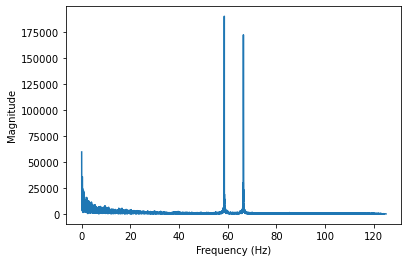

<Figure size 432x288 with 0 Axes>

In [113]:
plt.plot(freq, fftData)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()
plt.clf()

### Define Brainwave Bins
Gamma > 30 Hz
Beta 12–30 Hz
Alpha 8–12 Hz
Theta 4–8 Hz
Delta < 4 Hz

In [114]:
bandTotals = [0,0,0,0,0]
bandCounts = [0,0,0,0,0]

for point in range(len(freq)):
    if(freq[point] < 4):
        bandTotals[0] += fftData[point]
        bandCounts[0] += 1
    elif(freq[point] < 8):
        bandTotals[1] += fftData[point]
        bandCounts[1] += 1
    elif(freq[point] < 12):
        bandTotals[2] += fftData[point]
        bandCounts[2] += 1
    elif(freq[point] < 30):
        bandTotals[3] += fftData[point]
        bandCounts[3] += 1
    elif(freq[point] > 30):
        bandTotals[4] += fftData[point]
        bandCounts[4] += 1
        
# Save the average of all points 
bands = list(np.array(bandTotals)/np.array(bandCounts))

### Bar Chart of Brainwaves (Amplitude vs Wave Type)

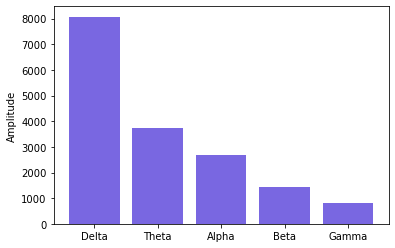

<Figure size 432x288 with 0 Axes>

In [115]:
def plotBands(bands):
    binNames = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
    plt.ylabel("Amplitude")
    plt.bar(binNames, bands, color="#7967e1")
    plt.show()
    plt.clf()
    
plotBands(bands)

### Identify most prevalent wave type

In [ ]:
waveType = {
    bands[0]:"Delta",
    bands[1]:"Theta",
    bands[2]:"Alpha",
    bands[3]:"Beta",
    bands[4]:"Gamma",}

max_waveType = waveType[max(bands)]
print(waveType[max(bands)])

In [ ]:
###TEST FLOW CONDITION
max_waveType = waveType[bands[2]]
print(max_waveType)

### Compare to Flowstate (Alpha or Theta) & Count Time spent in Flowstate
Is freq Alpha or Theta threshold?
    Yes - Play Chill playlist
    No higher - Play Relax playlist
    No lower - Play Hype playlist

In [122]:
flow_counter = 0
t = 0

while(t != 5): #fix this
    
    if max_waveType == (waveType[bands[1]]) or max_waveType == (waveType[bands[2]]): #is most prevalent wave type alpha or theta?
    # Start Flow Timer
        print("Start Flow")
        flow_start_time = time.time()
        print(flow_start_time)

        print("You are in FLOW!")

    #Play Flow Music
        player = vlc.MediaPlayer("file:///Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Chill music/" + random.choice(os.listdir("/Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Chill music")))
        player.play()
        time.sleep(10)
        player.stop()

    # End Flow Timer
        flow_end_time = time.time()
        print("End Flow")
        print(flow_end_time)
        print("--------------------")
        flow_duration = (flow_end_time - flow_start_time)/60 #converts second to minutes
    #TOTAL FLOW COUNTER
        flow_counter =+ flow_duration

    elif max_waveType == waveType[bands[0]]: #is most prevalent wave type delta?

        print("You are not in FLOW.")

        player = vlc.MediaPlayer("file:///Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Hype music/" + random.choice(os.listdir("/Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Hype music")))
        player.play()
        time.sleep(10)
        player.stop()

    elif max_waveType == (waveType[bands[3]]) or max_waveType == (waveType[bands[4]]): #is most prevalent wave type beta or gamma?

        print("You are not in FLOW.")

        player = vlc.MediaPlayer("file:///Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Relax music/" + random.choice(os.listdir("/Users/sam/Desktop/NatHacks/LastMinuteHealth/Music/Relax music")))
        player.play()
        time.sleep(10)
        player.stop()


#END TOTAL TIMER  
    manual_stop = input("Press enter to stop")
    total_end_time = time.time()
    
print("End time")
print(total_end_time)
print("--------------------")
total_duration = (total_end_time - total_start_time)/60 #converts second to minutes

print("You spent " + str(flow_counter) + " minutes of " + str(total_duration) + " minutes in the FLOW state.")

a
Start Flow
1627852211.7537339
You are in FLOW!
End Flow
1627852221.8000278
--------------------
Press enter to stop

End time
1627852267.360472
--------------------
You spent 0.16743823289871215 minutes of 7.2392525990804035 minutes in the FLOW state.


### TIMER CODE - FUTURE ADDITION
No need to set goal - tracks time and allows you to manually stop whenevere you want

In [ ]:
# print("Start time")
# total_start_time = time.time()
# print(total_start_time)
# manual_stop = input("Press enter to stop")
# total_end_time = time.time()
# print("End time")
# print(total_end_time)
# print("--------------------")
# total_duration = (total_end_time - total_start_time)/60 #converts second to minutes
# print(total_duration)


# flow_start_time = time.time()
# print(flow_start_time)
# manual_stop = input("Press enter to stop")
# flow_end_time = time.time()
# print(flow_end_time)
# print("--------------------")
# flow_duration = (flow_end_time - flow_start_time)/60 #converts second to minutes
# print(flow_duration)